In [1]:
import numpy as np
import cPickle
from PIL import Image
import matplotlib.pyplot as plt


In [3]:
def extractImagesAndLabels(path, file):
    f = open(path+file, 'rb')
    dicte = cPickle.load(f)
    images = dicte['data']
    Matrix=[]
    for i in images:
        ingle_img_reshaped = np.transpose(np.reshape(i,(3, 32,32)), (1,2,0))
        #x=np.dot(ingle_img_reshaped[...,:3], [0.299, 0.587, 0.114])
        x= ingle_img_reshaped.flatten()
        Matrix.append(x)
    #images = np.transpose(images, (1,2,0))
   
    Matrix = np.array(Matrix)
    labels = dicte['labels']
    labels = np.array(labels)
    print labels.shape
    return Matrix, labels
 
#     labels = dict['labels']
#     imagearray = mx.nd.array(images)
#     labelarray = mx.nd.array(labels)
#     return imagearray, labelarray

def extractCategories(path, file):
    f = open(path+file, 'rb')
    dict = cPickle.load(f)
    return dict['label_names']

def saveCifarImage(array, path, file):
    # array is 3x32x32. cv2 needs 32x32x3
    array = array.asnumpy().transpose(1,2,0)
    # array is RGB. cv2 needs BGR
    array = cv2.cvtColor(array, cv2.COLOR_RGB2BGR)
    # save to PNG file
    return cv2.imwrite(path+file+".png", array)

path = "/home/mohit/Desktop/Nptel/Week1_Deep Learning For Visual Learning/cifar10/cifar-10-batches-py/"
Train_data, Train_labels = extractImagesAndLabels(path, "data_batch_1")
Test_data, Test_labels = extractImagesAndLabels(path, "test_batch")



# categories = extractCategories("cifar-10-batches-py/", "batches.meta")

# cats = []
# for i in range(0,10):
#     saveCifarImage(imgarray[i], "./", "image"+(str)(i))
#     category = lblarray[i].asnumpy()
#     category = (int)(category[0])
#     cats.append(categories[category])
# print cats

(10000,)
(10000,)


In [4]:
from sklearn.svm import SVC

In [5]:
clf = SVC(kernel="linear",decision_function_shape='ovo')

In [6]:
clf.fit(Train_data, Train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
predict = clf.predict(Test_data)
from sklearn.metrics import accuracy_score
acc = accuracy_score(predict, Test_labels)

In [8]:
print acc


0.3031


In [9]:
clf2 = SVC(kernel="linear",decision_function_shape='ovr')
clf2.fit(Train_data, Train_labels)
acc_ovr= clf2.predict(Test_data)
acc_ovr_= accuracy_score(Test_labels,acc_ovr)



In [10]:
print "Accuracy one vs one", acc, "Accuracy one vs all ", acc_ovr_

Accuracy one vs one 0.3031 Accuracy one vs all  0.3031


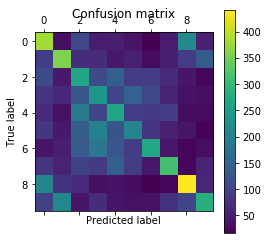

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(Test_labels, predict)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

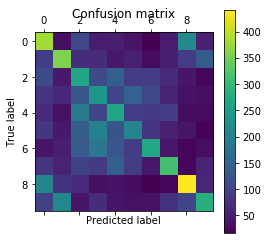

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(Test_labels, acc_ovr)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()